In [1]:
import numpy as np
from transformers import AutoModelForImageClassification, AutoFeatureExtractor
from transformers_interpret import ImageClassificationExplainer
from PIL import Image

import torch
import torch.nn.functional as F
from torchvision import transforms

In [4]:
model_name = "e1010101/vit-384-large-patch-tongue-image-segmented"
model = AutoModelForImageClassification.from_pretrained(model_name)
feature_extractor = AutoFeatureExtractor.from_pretrained(model_name)

config.json:   0%|          | 0.00/800 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

c:\Users\ezrat\anaconda3\envs\Standard\Lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [5]:
transform = transforms.Compose([
    transforms.Resize((384, 384)),
    transforms.ToTensor()
])

In [6]:
image = Image.open("../Samples/segmented/segmented_sample_2.jpg")
image_transformed = np.array(image)

In [7]:
idx_to_labels = {
    0: "Crack",
    1: "Red Dots",
    2: "Toothmark"
}

In [9]:
# output = model(image_transformed)
# output.logits

In [8]:
output_softmax = F.softmax(output.logits, dim=1)
prediction_score, pred_label_idx = torch.topk(output_softmax, 1)

pred_label_idx.squeeze_()
pred_label_idx.item()

2

In [9]:
predicted_label = idx_to_labels[pred_label_idx.item()]
print('Predicted:', predicted_label, '(', prediction_score.squeeze().item(), ')')

Predicted: Toothmark ( 0.9843311905860901 )


In [10]:
image_classification_explainer = ImageClassificationExplainer(model=model, feature_extractor=feature_extractor, attribution_type="IG")

In [11]:
image_attributions = image_classification_explainer(image_transformed)

In [12]:
print(image_attributions.shape)

(1, 3, 384, 384)


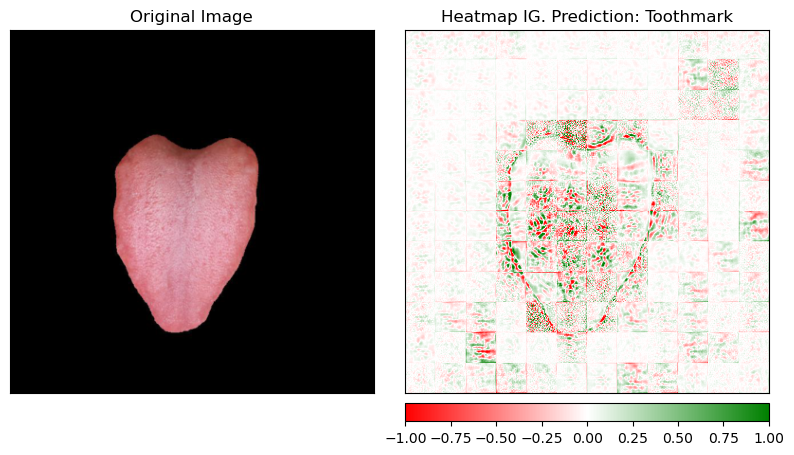

(<Figure size 800x600 with 4 Axes>,
 array([<Axes: title={'center': 'Original Image'}>,
        <Axes: title={'center': 'Heatmap IG. Prediction: Toothmark'}>],
       dtype=object))

In [13]:
image_classification_explainer.visualize(
    method="heatmap",
    side_by_side=True,
)